In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df = pd.read_csv("Generated_Books.csv")

In [3]:
df.head(10)

,S.No,Name,Age,Book Title,Author,Category,Year,Issued Date,Return Date,Reading Score
0,1,Ethan Parker,48,Shadows of the Dawn,Emilia Richards,Fiction,2001,"January 2, 2023","January 4, 2023",6
1,2,Olivia Bennett,38,Echoes of Eternity,Jasper King,Fantasy,2015,"January 3, 2023","January 16, 2023",8
2,3,Liam Collins,44,The Quantum Conundrum,Dr. Evelyn Morris,Science Fiction,2022,"January 4, 2023","January 11, 2023",7
3,4,Ava Thompson,26,Heartbeats in the Wilderness,Laura Bennett,Romance,1998,"January 5, 2023","January 22, 2023",9
4,5,Noah Harris,43,The Silent Scream,Marcus Young,Thriller,2008,"January 6, 2023","January 8, 2023",2
5,6,Isabella Green,57,Whispers in the Wind,Caitlyn Foster,Mystery,2010,"January 9, 2023","January 25, 2023",8
6,7,Mason Lewis,46,The Alchemist's Secret,Daniel Sinclair,Historical Fiction,2003,"January 10, 2023","January 12, 2023",9
7,8,Sophia Rivera,49,Journey to the Lost City,Anthony Greene,Adventure,1995,"January 11, 2023","January 18, 2023",4
8,9,Lucas Walker,54,Songs of the Seraphim,Annabelle Blake,Fantasy,2017,"January 12, 2023","January 30, 2023",6
9,10,Mia King,40,In the Shadow of Giants,Peter Harding,Non-Fiction,2009,"January 13, 2023","January 23, 2023",9


In [4]:
datasubset = df.loc[:, ["Age", "Reading Score"]]

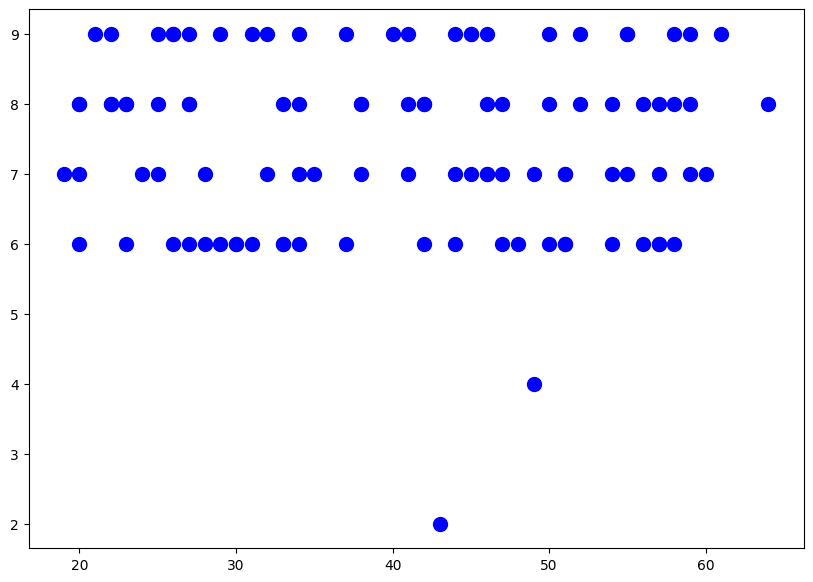

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(datasubset[["Age"]], datasubset[["Reading Score"]], s=100, c='blue')

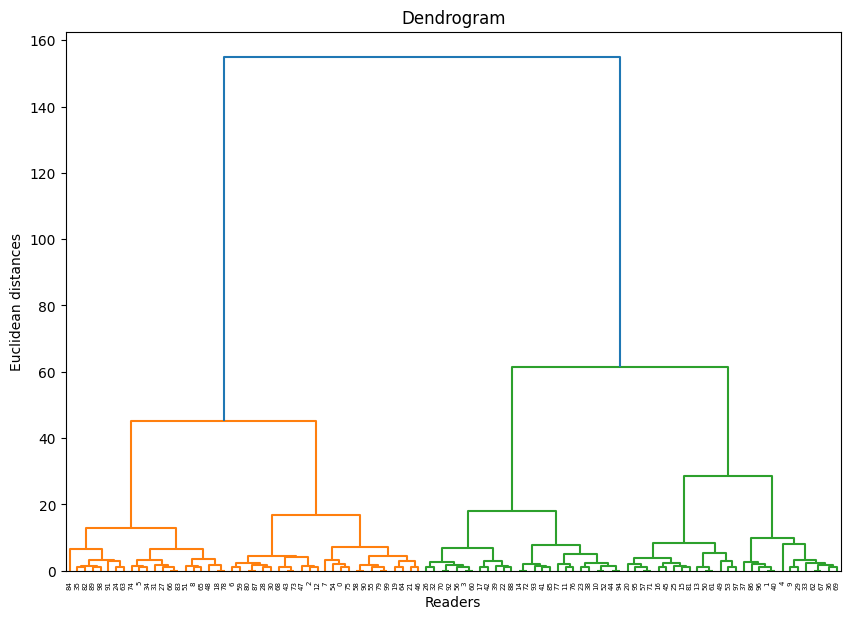

In [6]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(datasubset, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Readers')
plt.ylabel('Euclidean distances')
plt.show()

Here we got the Dendrogram of the dataset

**Hierarchical Clustering**

In [7]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')  
cluster.fit_predict(datasubset)

array([1, 2, 1, 0, 2, 3, 1, 1, 3, 2, 0, 0, 1, 4, 0, 4, 4, 0, 3, 1, 4, 1,
       0, 0, 3, 4, 0, 3, 1, 2, 1, 3, 0, 2, 3, 3, 2, 2, 0, 0, 2, 0, 0, 1,
       0, 4, 1, 1, 3, 4, 4, 3, 0, 4, 1, 1, 0, 4, 1, 1, 0, 4, 2, 3, 1, 3,
       3, 2, 1, 2, 0, 4, 0, 1, 3, 1, 0, 0, 3, 1, 1, 4, 3, 3, 3, 0, 2, 1,
       0, 3, 1, 3, 0, 0, 0, 4, 2, 4, 3, 1])

In [8]:
cl = cluster.fit_predict(datasubset)

In [9]:
from sklearn.metrics import silhouette_score

**Generating Silhouette_score**

In [10]:
silhouette_score(datasubset,cl)

np.float64(0.49856146996276074)

In [11]:
X = datasubset.values

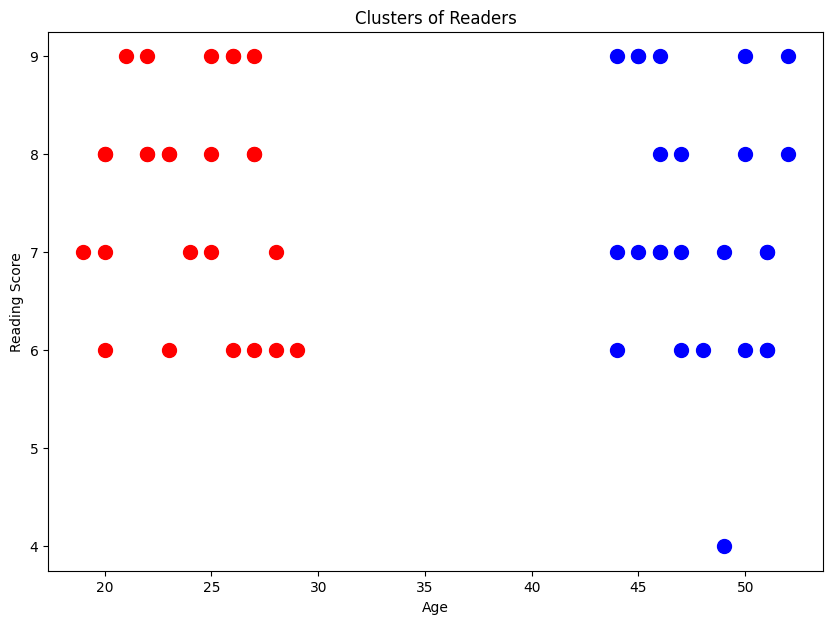

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Clusters of Readers')
plt.xlabel('Age')
plt.ylabel('Reading Score')
plt.show()

**K-Means Clustering**

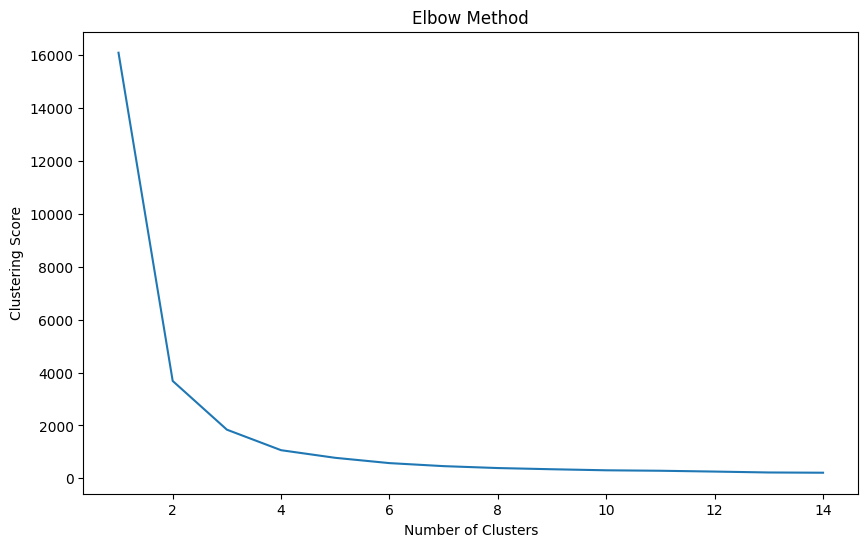

In [18]:
from sklearn.cluster import KMeans
#try kmeans
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [19]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(X)


pred = kmeans.predict(X)

pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [20]:
silhouette_score(X,pred)

np.float64(0.6417947981119606)